In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
primary_leanings = pd.read_csv("/Users/adamaraju/Desktop/primary_leanings.csv")
county_facts = pd.read_csv("/Users/adamaraju/Desktop/county_facts.csv")

In [73]:
primary_leanings.head()

,state,state_abbreviation,county,fips,Democrat Votes,Republican Votes,Republican Leaning,Democrat Leaning
0,Alabama,AL,Autauga,1001.0,2931,11839,0.801557,0.198443
1,Alabama,AL,Baldwin,1003.0,11783,53544,0.819630,0.180370
2,Alabama,AL,Barbour,1005.0,4469,5395,0.546938,0.453062
3,Alabama,AL,Bibb,1007.0,16764,19028,0.531627,0.468373
4,Alabama,AL,Blount,1009.0,6057,35487,0.854203,0.145797


In [74]:
def candfunc(row):
    if row['Republican Leaning'] >= 0.50:
        val = 1
    else:
        val = 0
        
    return val

In [76]:
primary_leanings['isRepublican'] = primary_leanings.apply(candfunc, axis=1)

In [81]:
primary_leanings.head()

,state,state_abbreviation,county,fips,Democrat Votes,Republican Votes,Republican Leaning,Democrat Leaning,isRepublican
0,Alabama,AL,Autauga,1001.0,2931,11839,0.801557,0.198443,1
1,Alabama,AL,Baldwin,1003.0,11783,53544,0.819630,0.180370,1
2,Alabama,AL,Barbour,1005.0,4469,5395,0.546938,0.453062,1
3,Alabama,AL,Bibb,1007.0,16764,19028,0.531627,0.468373,1
4,Alabama,AL,Blount,1009.0,6057,35487,0.854203,0.145797,1


In [86]:
results = primary_leanings.merge(county_facts, on = 'fips')
results.head()

,state,state_abbreviation_x,county,fips,Democrat Votes,Republican Votes,Republican Leaning,Democrat Leaning,isRepublican,area_name,...,"Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010",Unnamed: 54
0,Alabama,AL,Autauga,1001.0,2931,11839,0.801557,0.198443,1,Autauga County,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,NaN
1,Alabama,AL,Baldwin,1003.0,11783,53544,0.819630,0.180370,1,Baldwin County,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,NaN
2,Alabama,AL,Barbour,1005.0,4469,5395,0.546938,0.453062,1,Barbour County,...,27.0,0,0,188337,6334,0,8,884.88,31.0,NaN
3,Alabama,AL,Bibb,1007.0,16764,19028,0.531627,0.468373,1,Bibb County,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,NaN
4,Alabama,AL,Blount,1009.0,6057,35487,0.854203,0.145797,1,Blount County,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,NaN


In [87]:
sns.set(style="whitegrid", color_codes=True)

(10, 35)

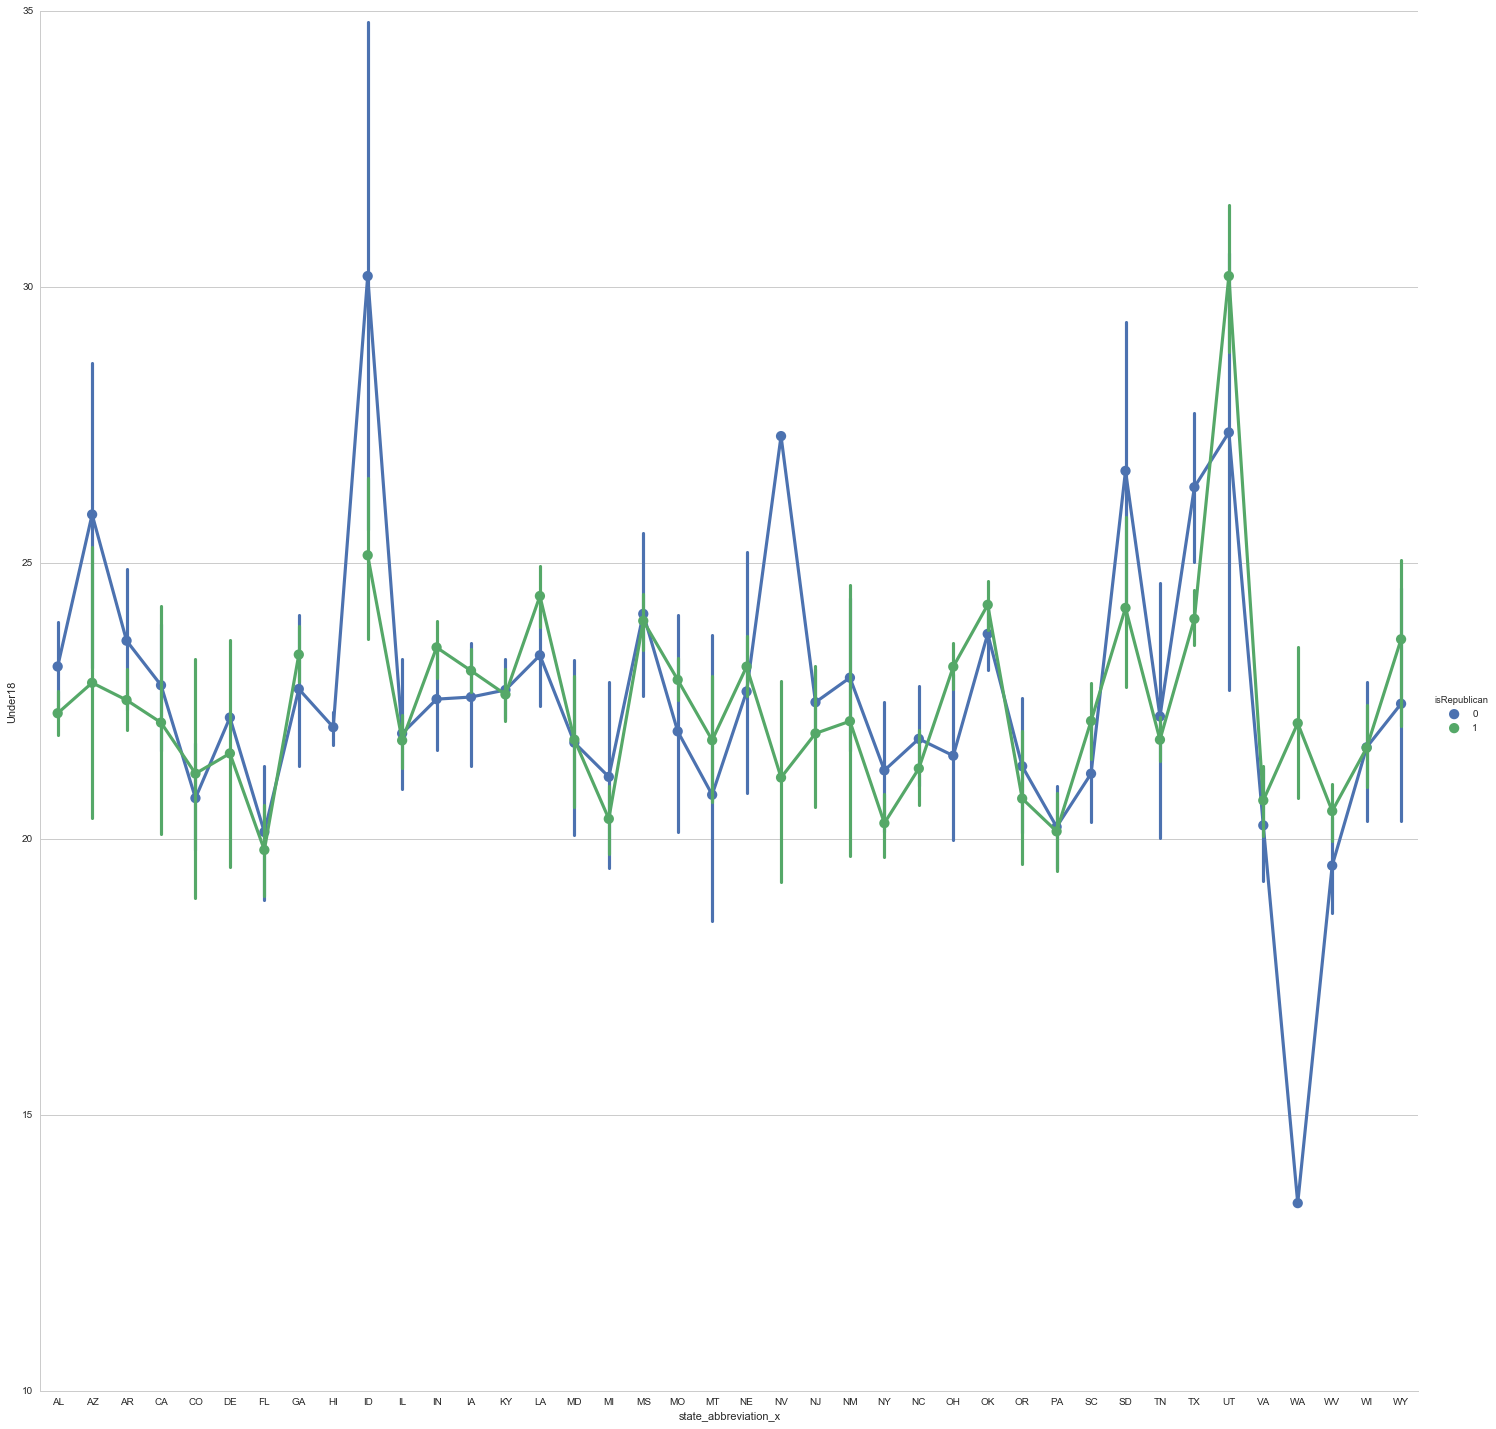

In [116]:
sns.factorplot(x="state_abbreviation_x", y="Under18", hue="isRepublican", data=results, size= 20, aspect=1)
sns.plt.ylim(10,35)

(10, 35.0)

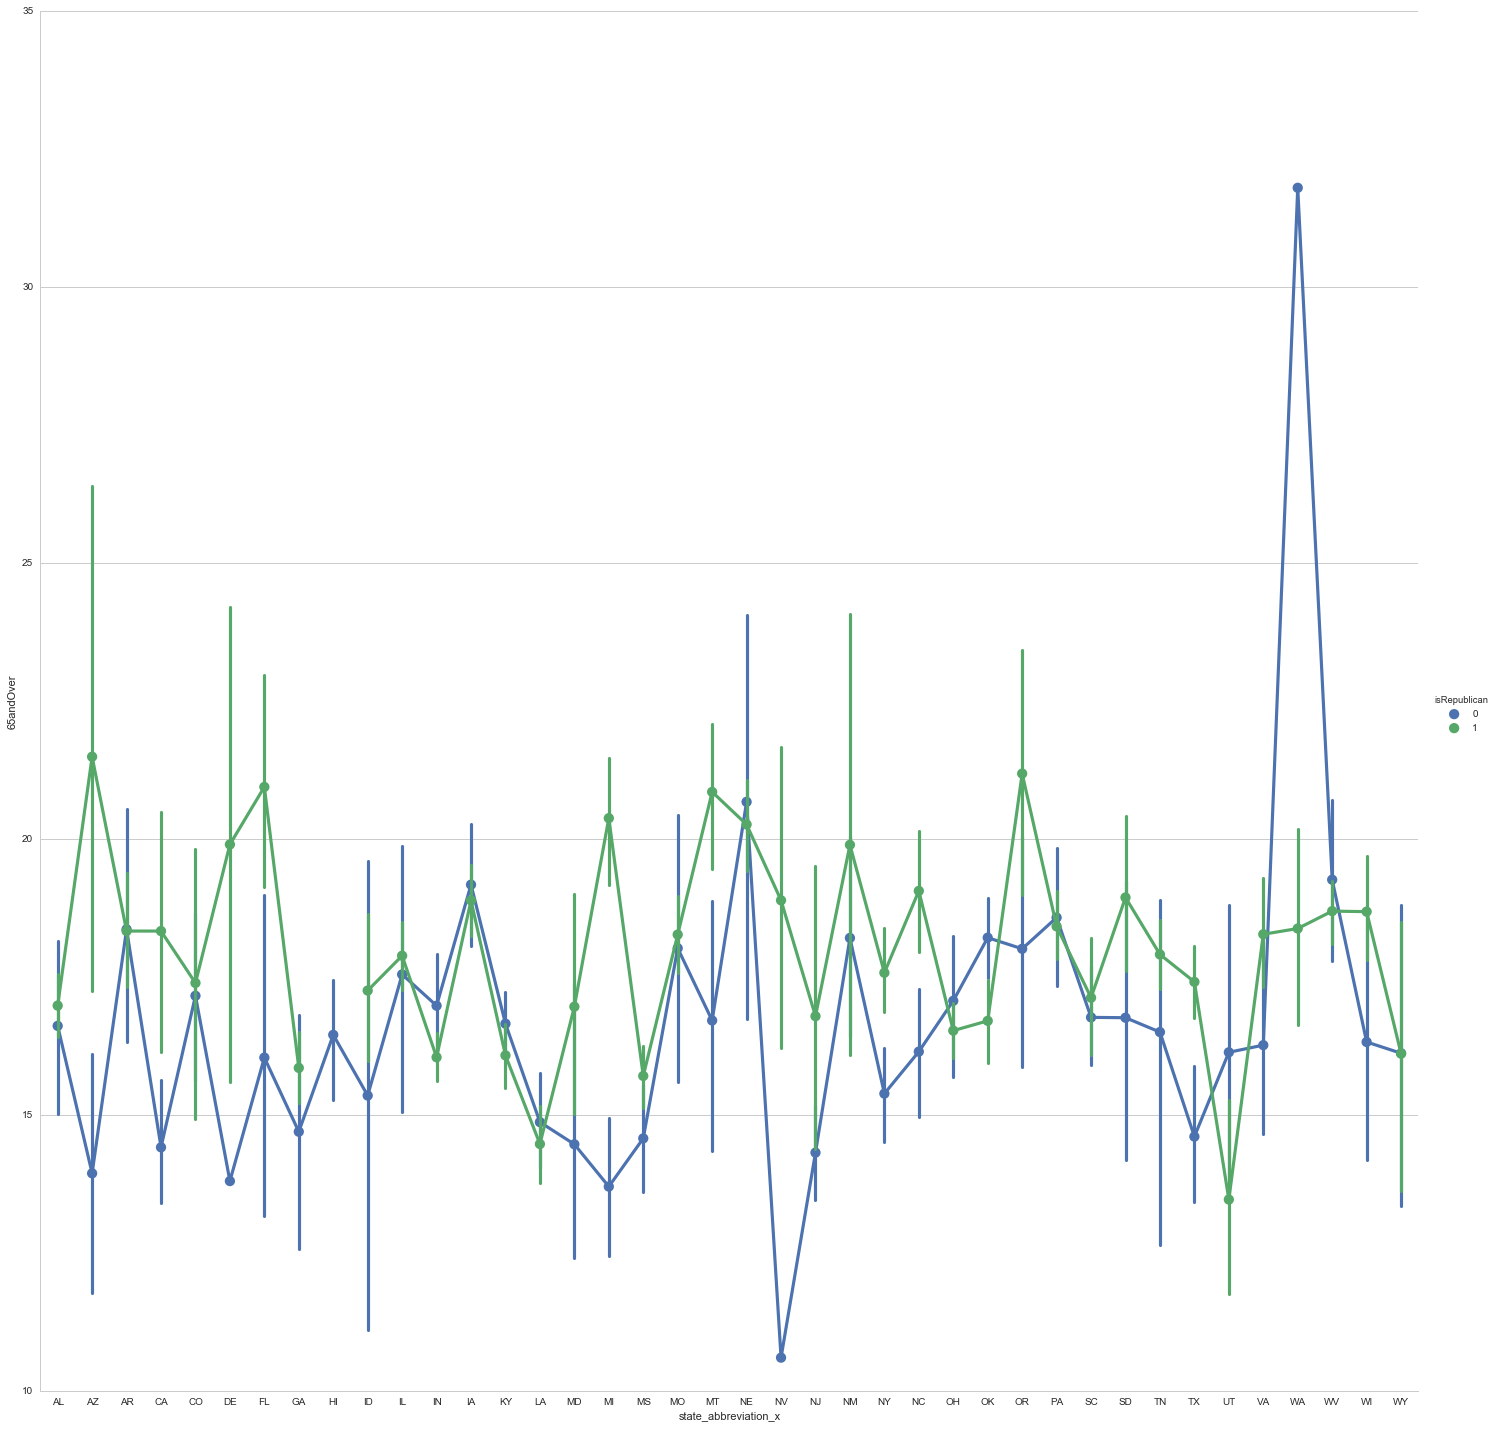

In [108]:
sns.factorplot(x="state_abbreviation_x", y="65andOver", hue="isRepublican", data=results, size= 20, aspect=1)
sns.plt.ylim(10,)

(0, 80.0)

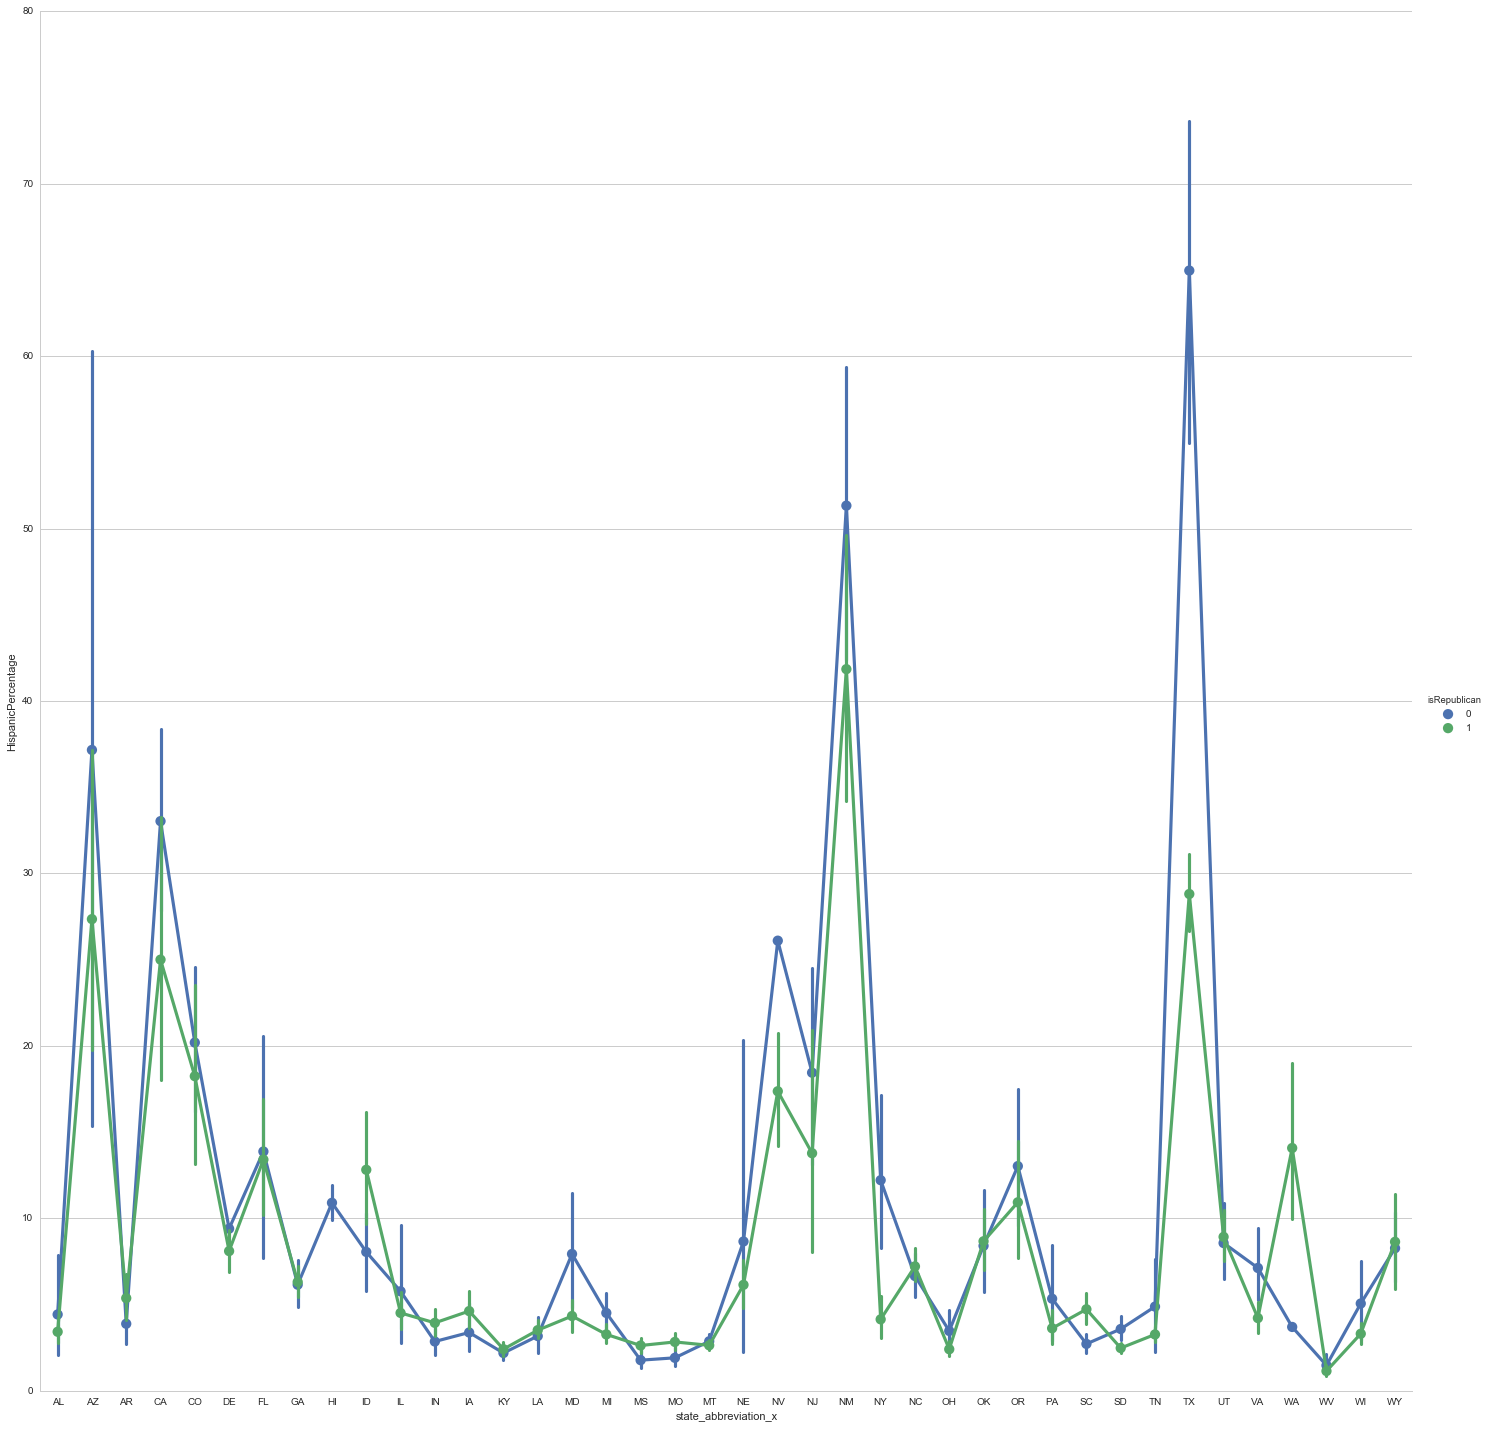

In [95]:
sns.factorplot(x="state_abbreviation_x", y="HispanicPercentage", hue="isRepublican", data=results, size= 20, aspect=1)
sns.plt.ylim(0,)

(0, 80.0)

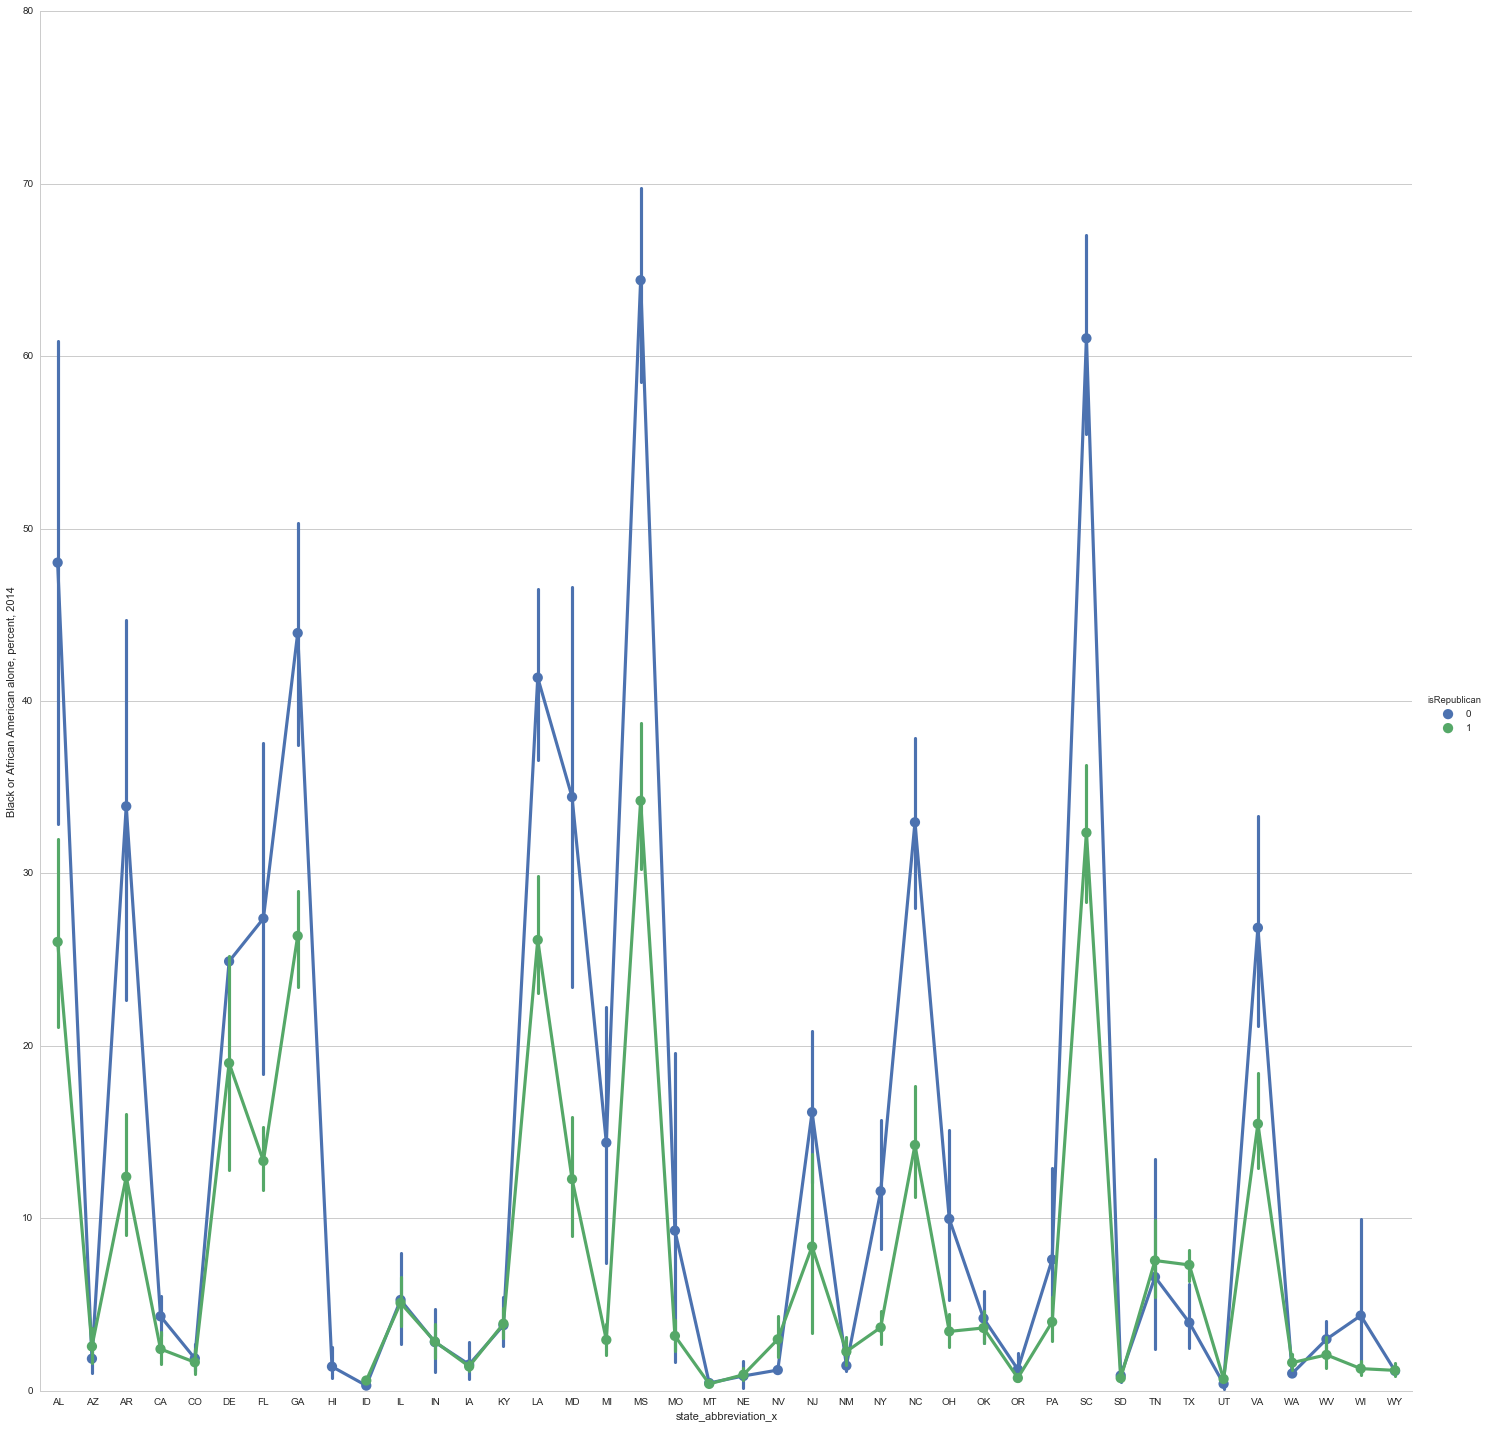

In [98]:
sns.factorplot(x="state_abbreviation_x", y="Black or African American alone, percent, 2014", hue="isRepublican", data=results, size= 20, aspect=1)
sns.plt.ylim(0,)

(0, 30.0)

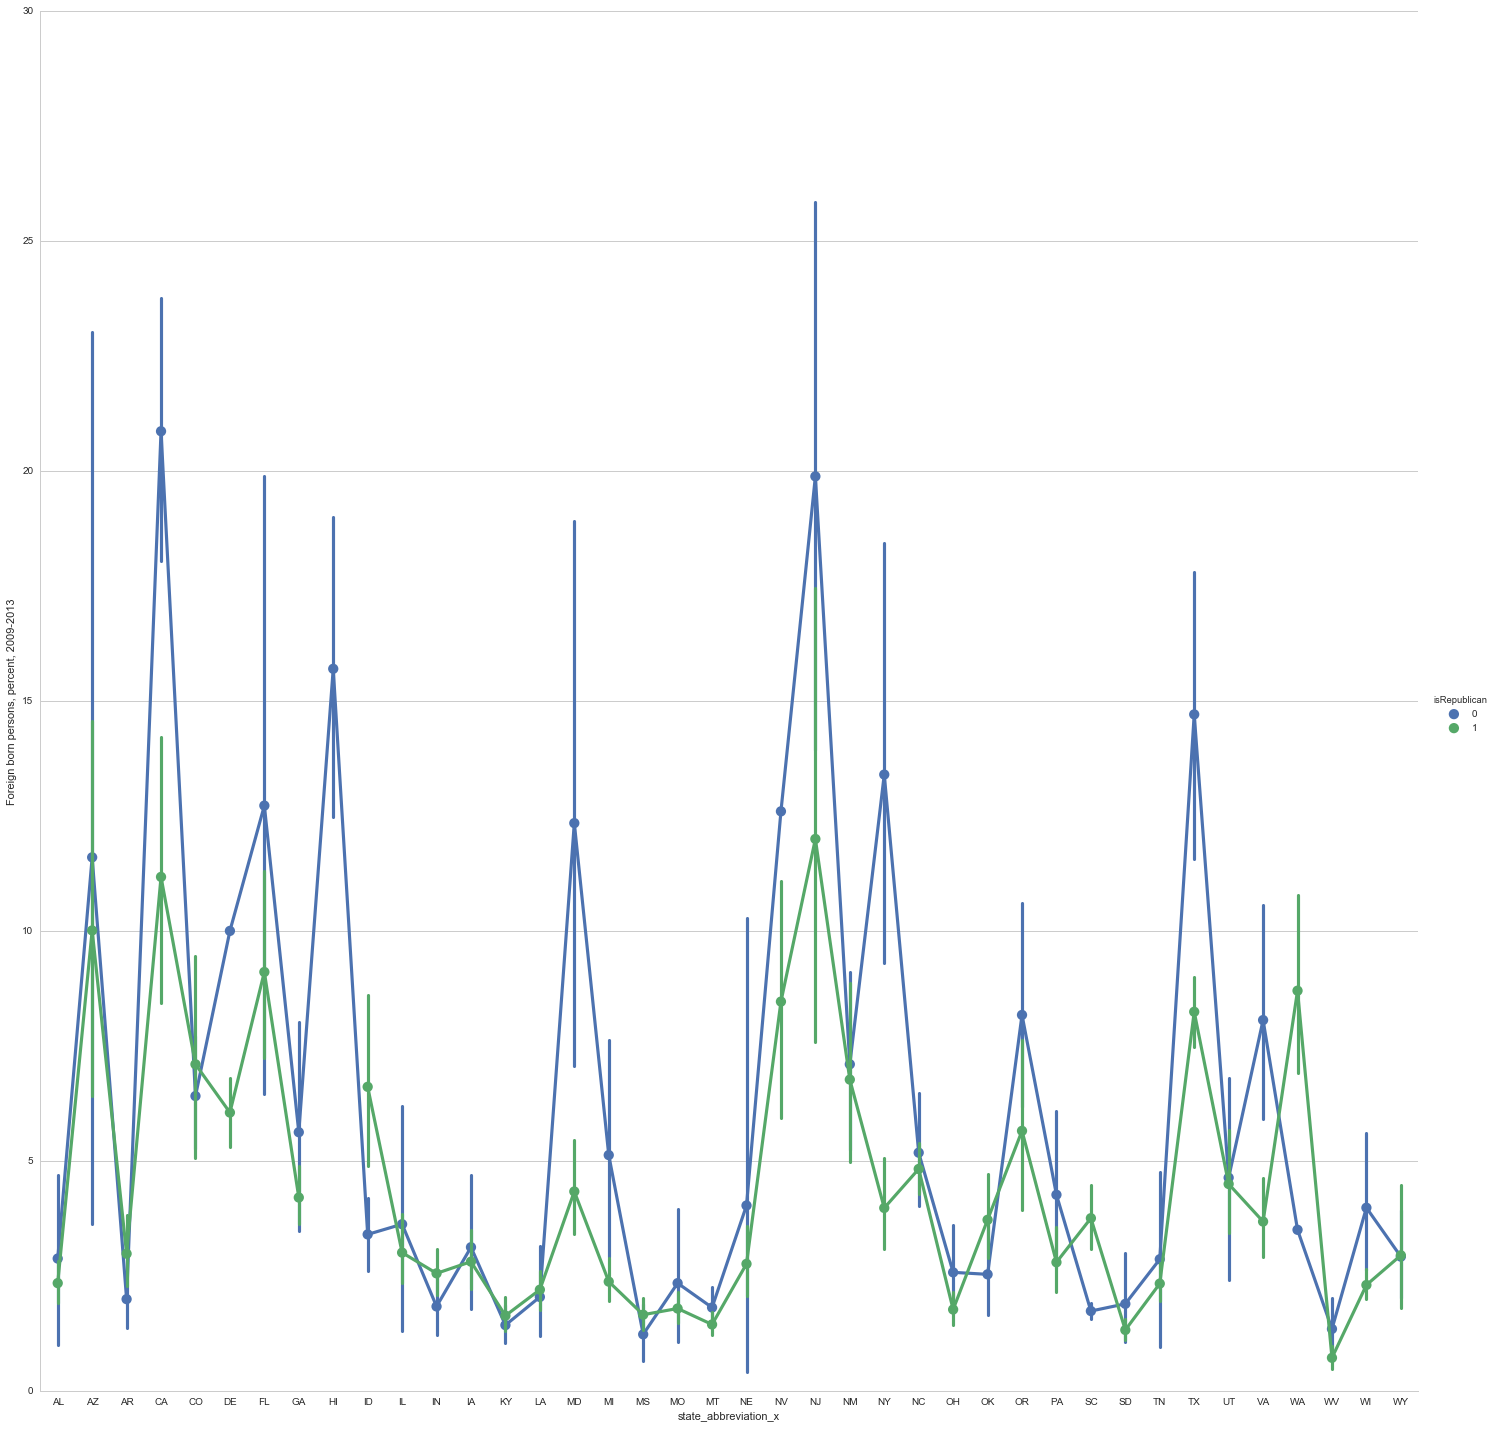

In [99]:
sns.factorplot(x="state_abbreviation_x", y="Foreign born persons, percent, 2009-2013", hue="isRepublican", data=results, size= 20, aspect=1)
sns.plt.ylim(0,)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lm = LogisticRegression()
lm.fit(results[['Under18', '65andOver', 'HispanicPercentage']], results['isRepublican'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
print lm.coef_
print lm.intercept_
print results.isRepublican.mean()

[[ 0.11504968  0.10363869 -0.02601775]]
[-2.80776161]
0.783416726233


In [104]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print results.isRepublican.mean()

[[ 1.12192917  1.10919961  0.97431779]]
[ 0.06033991]
0.783416726233


In [111]:
feature_set = results[['Under18', '65andOver', 'HispanicPercentage']]
print lm.score(feature_set, results['isRepublican'])

0.79449606862


In [ ]:
from sklearn import grid_search, cross_validation

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(titanic), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
gs.grid_scores_
#print gs.best_estimator_